# Hospital readmissions 



* Exploratory Data Analysis
* Data Cleaning
* Data Visualization
* Statistical Analysis & Hypothesis Testing
* Machine Learning

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix

In [2]:
dm = pd.read_csv('D:\\Users\\Desktop\\Python code\\GitHub\\Flowstateofmind\\Data\\csv\\hospital_readmissions.csv')
dm

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [3]:
dm.info()
dm.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [4]:
print('This dataset consists of 25,000 records of admissions for patients with diabetes mellitus (DM) and does not contain any null values.')

This dataset consists of 25,000 records of admissions for patients with diabetes mellitus (DM) and does not contain any null values.


## The number of hospital admissions categoryized by patient age.

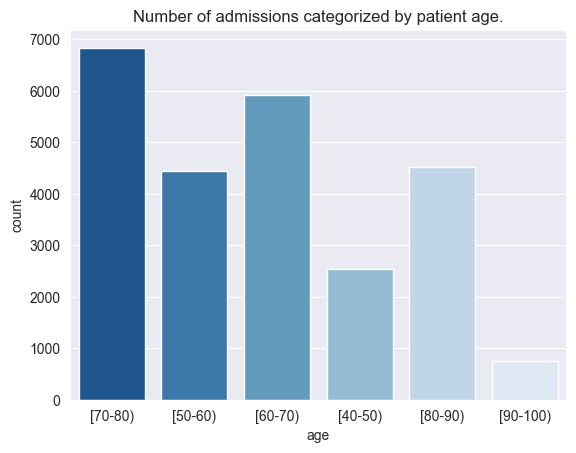

,age,count
4,[40-50),2532
3,[50-60),4452
1,[60-70),5913
0,[70-80),6837
2,[80-90),4516
5,[90-100),750


In [5]:
sns.set_style('darkgrid')
sns.countplot(data = dm, x = 'age', palette = sns.color_palette('Blues', 6)[::-1])
plt.title('Number of admissions categorized by patient age.')
plt.show()

dm['age'] = dm['age'].astype('category')
dm['age'] = dm['age'].cat.reorder_categories(new_categories = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'], ordered = True)
age = dm['age'].value_counts().reset_index().rename(columns = {'index':'age', 'age':'count'}).sort_values('age', ascending = True)
age

## The relationship between age and readmission among DM patients.

In [6]:
dm['readmitted'] = dm['readmitted'].astype('category')
readmitted_code = dm['readmitted'].cat.codes
readmitted_map = dict(zip(dm['readmitted'], readmitted_code))
dm['readmitted'] = dm['readmitted'].replace(readmitted_map)
print('readmitted map')
readmitted_map

readmitted map


{'no': 0, 'yes': 1}

H0 : There is no relationships between readmission and age groups.

readmitted         0         1
age                           
[40-50)     0.554897  0.445103
[50-60)     0.558401  0.441599
[60-70)     0.531541  0.468459
[70-80)     0.512067  0.487933
[80-90)     0.504207  0.495793
[90-100)    0.578667  0.421333



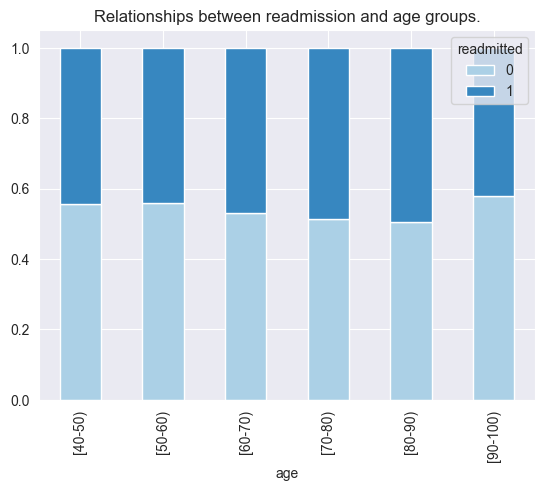

There is a statistically significant association between the age groups and the readmission status.
Chi-square statistic :  48.787297263120706
Degree of freedom :  5
P-value :  2.4528660957495622e-09
This means that the readmission status is dependent on the age groups, and the relationship observed in the data is unlikely to have occurred by chance.
Therefore, The null hypothesis can be rejected.


In [7]:
print('H0 : There is no relationships between readmission and age groups.') 
print()
readmit_age = dm.groupby('age')['readmitted'].value_counts(normalize = True).unstack()
print(readmit_age)
print()

readmit_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 2))
plt.title('Relationships between readmission and age groups.')
plt.show()

readmit_age = dm.groupby('age')['readmitted'].value_counts(normalize = False).unstack()
chi_stat, pvalue, df, expected = stats.chi2_contingency(readmit_age)
print('There is a statistically significant association between the age groups and the readmission status.')
print('Chi-square statistic : ', chi_stat)
print('Degree of freedom : ', df)
print('P-value : ', pvalue)
print('This means that the readmission status is dependent on the age groups, and the relationship observed in the data is unlikely to have occurred by chance.')
print('Therefore, The null hypothesis can be rejected.')

# The most common primary diagnosis.

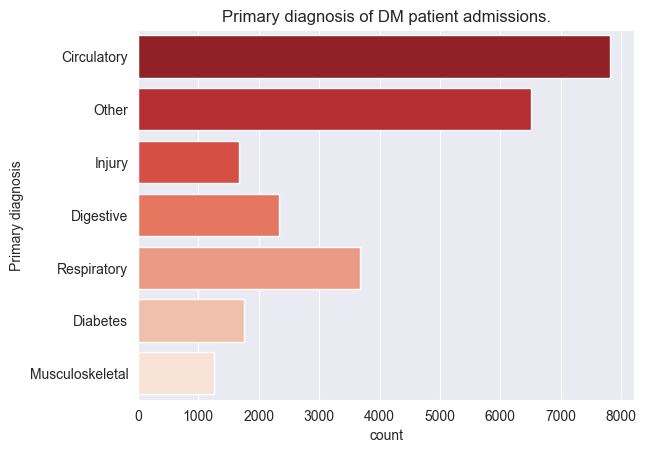

Circulatory        7824
Other              6502
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Name: diag_1, dtype: int64

In [8]:
dm.loc[dm['diag_1'] == 'Missing', 'diag_1'] = 'Other'
primary_diag = dm['diag_1'].value_counts()

sns.countplot(data = dm, y = 'diag_1', palette = sns.color_palette('Reds', 7)[::-1])
plt.title('Primary diagnosis of DM patient admissions.')
plt.ylabel('Primary diagnosis')
plt.show()

primary_diag

## The relationship between HbA1C level and readmission.

This study included only DM patients who were admitted and had their HbA1C levels checked.
Null hypothesis : There is no relationship between HbA1C level during admission and readmission among DM inpatients in this hospital.


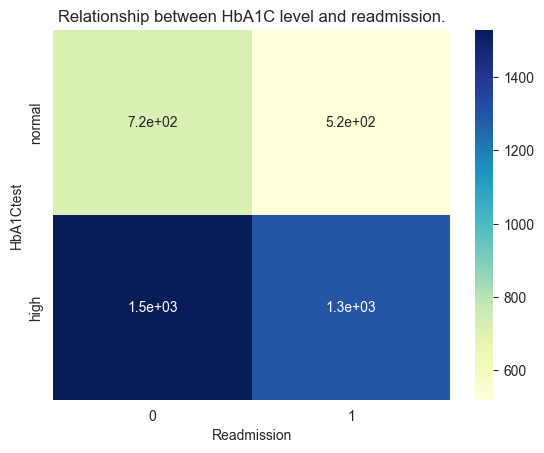

Chi-square statistic : 4.9832040193002705
Degree of freedom : 1
P-value : 0.0255945393560662

Based on the p-value, which is less than the conventional significance level of 0.05, we reject the null hypothesis.
This indicates that there is a statistically significant relationship between HbA1C level during admission and readmission among DM inpatients in the hospital.

In summary, the data suggests that the HbA1C level during admission is associated with the likelihood of readmission among DM inpatients. 
It may be worth investigating whether higher HbA1C levels indicate poorer glycemic control and therefore contribute to an increased risk of readmission.
Additionally, examining other factors such as medication adherence, comorbidities, or length of hospital stay could provide additional insights into readmission patterns among DM inpatients.


In [9]:
print('This study included only DM patients who were admitted and had their HbA1C levels checked.')
print('Null hypothesis : There is no relationship between HbA1C level during admission and readmission among DM inpatients in this hospital.')
dm['A1Ctest'] = dm['A1Ctest'].astype('category')
dm['A1Ctest'] = dm['A1Ctest'].cat.reorder_categories(new_categories=['no', 'normal', 'high'], ordered = True)


a1c_readmit = pd.crosstab(dm['A1Ctest'][~(dm['A1Ctest'] == 'no')], dm['readmitted'])
sns.heatmap(a1c_readmit, annot = True, cmap = 'YlGnBu')
plt.xlabel('Readmission')
plt.ylabel('HbA1Ctest')
plt.title('Relationship between HbA1C level and readmission.')
plt.show()

chi_stat, pvalue, df, expected = stats.chi2_contingency(a1c_readmit)
print('Chi-square statistic :', chi_stat)
print('Degree of freedom :', df)
print('P-value :', pvalue)
print()
print('Based on the p-value, which is less than the conventional significance level of 0.05, we reject the null hypothesis.')
print('This indicates that there is a statistically significant relationship between HbA1C level during admission and readmission among DM inpatients in the hospital.')
print()
print('In summary, the data suggests that the HbA1C level during admission is associated with the likelihood of readmission among DM inpatients. ')
print('It may be worth investigating whether higher HbA1C levels indicate poorer glycemic control and therefore contribute to an increased risk of readmission.')
print('Additionally, examining other factors such as medication adherence, comorbidities, or length of hospital stay could provide additional insights into readmission patterns among DM inpatients.')

## Time in hospital comparison between elderly (age >= 60)and non-elderly.

Null hypothesis : There is no significant difference of daytime in hospital between elderly and non-elderly.


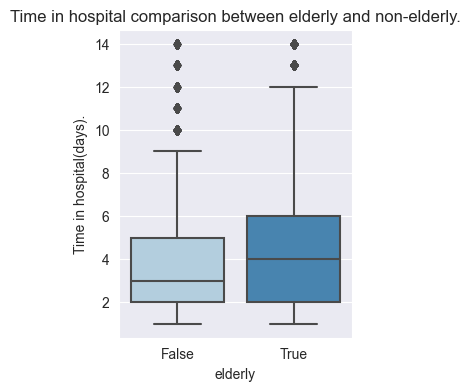

           count      mean       std  min  25%  50%  75%   max
elderly                                                       
False     6984.0  4.102663  2.906618  1.0  2.0  3.0  5.0  14.0
True     18016.0  4.589254  3.026614  1.0  2.0  4.0  6.0  14.0

Median difference time in hospital : 1.0 day., 95%CI [0.918763311970568, 1.081236688029432]
P-value : 5.2032648501478255e-39
This suggests strong evidence reject the null hypothesis, indicating that there is a significant difference in the daytime spent in the hospital between elderly and non-elderly patients.


In [10]:
print('Null hypothesis : There is no significant difference of daytime in hospital between elderly and non-elderly.')
dm['elderly'] = dm['age'].replace({'[40-50)':False, '[50-60)':False, '[60-70)':True, '[70-80)':True, '[80-90)':True, '[90-100)':True})


plt.figure(figsize = (3, 4))
sns.boxplot(data = dm, x = 'elderly', y = 'time_in_hospital', palette = sns.color_palette('Blues', 2))
plt.title('Time in hospital comparison between elderly and non-elderly.')
plt.ylabel('Time in hospital(days).')
plt.show()


print(dm.groupby('elderly')['time_in_hospital'].describe())
print()

class hypothesis() : 
    def test(self, group1, group2, tailed = 'two-tailed', CI = 0.95) :
        self.alpha = 1 - CI
        self.z_alpha = stats.norm.ppf(1-(self.alpha/2))
        self.diff = group1.median() - group2.median()
        self.std_error = np.sqrt((np.var(group1)/len(group1)) + (np.var(group2)/len(group2)))
        self.CI_low = self.diff - (self.z_alpha * self.std_error)
        self.CI_high = self.diff + (self.z_alpha * self.std_error)
        self.stat, self.pvalue = stats.mannwhitneyu(group1, group2)
        return self.diff, [self.CI_low, self.CI_high], self.pvalue
time_elderly = hypothesis()
diff, CI, pvalue = time_elderly.test(dm[dm['elderly'] == True]['time_in_hospital'], dm[dm['elderly'] == False]['time_in_hospital'])
print('Median difference time in hospital :', diff, 'day., 95%CI', CI)
print('P-value :', pvalue)
print('This suggests strong evidence reject the null hypothesis, indicating that there is a significant difference in the daytime spent in the hospital between elderly and non-elderly patients.')

## Correlation between time in hospital and number of lab procedures.

In [17]:
plt.figure(figsize = (16, 8))
ns.lmplot(data = dm, x = 'time_in_hospital', y = 'n_lab_procedures', lowess = True, scatter_kws = {'alpha':0.05})
plt.show()

NameError: name 'ns' is not defined

<Figure size 1600x800 with 0 Axes>